<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Ultimate Data Challenge</h3>
</div>


#### Problem Statement

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. 

The data was pulled several months later; we consider a user retained if they
took a trip over the "preceding" 30 days.

Help our stakeholders understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate

Rubric:

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice)


<br/>

#### Approach
After data inspection and cleanup, trasform and enrich the data.

      - add a binary retained column containing users who have had trips in the 30 days ending on 7/2014
      - add a column for the amount of time between each user's signup date and their last trip date

Feature reduction is not really necessary with this dataset

Perform feature selection in the following ways:

      - measure correlation between all columns
      - measure the top features that have correlation to the retained label
      - Use XGBoost to measure feature importance 
      - Use featuretools to see what columns it would create
       

Perform a deep learning experiments:

      - Using all of the features  -- f1-score: .94
      - Using just the features that came with the dataset -- f1 score:  .50


---

#### Project Phases

<font color=teal>Ultimate 03.01 - Feature Selection</font>

<font color=teal>Summary</font>

Only one of the calculated features gets a high score.  The rest do not get high scores, but it may be that a ML solution can pull out some meaning from the combination of features.  I think it would be a good plan to use deep learning for that sort of task.

It appears that the best features are:

      - The length of time the user has been a user.  This is a calaulated column measuring the amount of time between signup and the user's last trip.  It may seem like the very definition of 'retained,' but our actual definition for this project is whether the user has taken a trip over the last thirty days.  These are mechanically different.
    
      - Some weak runner ups are: The city of Kings Landing, the average rating by driver, whether the user provided any mobile phone info, and ultimate black user are next-best, but they get low scores and are questionable predictors


<font color=teal>Approach</font>

Perform feature selection in the following ways:

      - measure correlation between all columns
      - measure the top features that have correlation to the retained label
      - Use XGBoost to measure feature importance 
      - Use featuretools to see what columns it would create


<font color=teal>Ultimate 03.02 - Build a predictive model</font>
According to the problem statement we are trying to predict the 'future' which sounds like a big hint that this is a time series problem, but I did not see that the 

Because there's little correlation between retention and most of the features, I think it would be more tenuous to get to a prediction using a linear or ARIMA model.
We experimented with gradient boosting during feature selection, and it scored high only on our calculated feature-the single days between signup. 
A deep learning model is sometimes able to combine and make some sense out of seemingly non-linear relationships—and I think that's the best approach for the predictive model

but I think starting with an LSTM or transformer network would be overkill for this data-it's difficult to think about how one would structure the input given the daya we hav 



<br/>

#### Conclusion

We don't have an end date that we can use to determine when the 30 days end, so we'll use the last date in the dataset as 'today' and work backward 30 days from there

Using that approach, it looks like the retained percentage as of July 2014 is 36%

Coming out of feature selection, it appears that the best predictors of retention are:

<br/>

- The length of time the user has been a user.  This is a calculated column measuring the amount of time between signup and the user's last trip.  It may seem like the very definition of 'retained,' but our actual definition for this project is whether the user has taken a trip over the last thirty days.  These are mechanically different.
    
- Some weak runner ups are: The city of Kings Landing, the average rating by driver, whether the user provided any mobile phone info, and ultimate black user are next-best, but they get low scores and are questionable predictors



Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

<font color=orange>See the approach description above and this notebook for specifics.   Using the maximun last_trip_date in the dataset as the 'last' day and counting 30 days back, the retained percentage is 37%</font>


Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.


<font color=orange>See the discussion above, but users who have been active for several months are more likely to stay active and be retained.  

<font color=orange>We had reasonably good success with a simple ANN deep learning model that seems to predict, but even if that model works, it is a complex standalone prediction.

<font color=orange>It would be difficult to take any lessons from it that a marketing team could use to target users. Likely, It could only be used as a 'black-box' predictor.</font>

</font>




Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice)

<font color=orange>As obvious as it sounds, users who have been active for several months are more likely to stay active and be retained.  The only simple target we might have is to keep users who are already active...happpy..</font>

<font color=orange>I could not see that any of the other features have a clear linear relationship to retention,  
For example, we might be able to say that people who input their phone information are more likely, or that users from Kings Landing are more likely, but it would be tenuous to tell a marketing team that any of these individual features are worth targeting.
</font>











<br/>

#### Next steps

- Assuming for a moment that we can't aquire more and better data
- The next best steps are to test the data we do have in a predictive model
- We'll try to predict with our custom date and with the original data and see what we get.






In [1]:
from ultimate_utils import read_ultimate_data, add_retained_label,perform_data_transforms
from ultimate_utils import encode_ultimate_features
from ultimate_utils import plot_heatmap
from ultimate_utils import correlate_to_target, plot_correlations
from ultimate_utils import calc_feature_importance

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Read and review data</h3>
</div>

- 50,000 rows
- Signups range from 1/1/2014 to 1/31/2014—a single month
- Last trip dates range from 1/3/2014 to 7/1/2014
- 

In [2]:
df = read_ultimate_data()


In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.dtypes

city                            category
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                           category
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

50,000 rows and 11 columns

In [5]:
df.shape

(50000, 12)

It Contains one month of data from 2014-01-01 to 2014-01-31

In [6]:
df.agg(
    {'signup_date': ['min', 'max'], 'last_trip_date': ['min', 'max']}
).reset_index()

,index,signup_date,last_trip_date
0,min,2014-01-01,2014-01-01
1,max,2014-01-31,2014-07-01


16% of avg_rating_of_drive (8122 records) are null
0.4 % of avg_rating_by_drive (201 records) are null


In [7]:
df.isna().sum().sort_values(ascending=False)

avg_rating_of_driver      8122
phone                      396
avg_rating_by_driver       201
city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
dtype: int64

<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Transforms</h3>
</div>


#### Categorize users as either retained or not 

The definition of a retained user is one who has taken a trip over the "last" thirty days.   But no end data is provided. 
The logic I'll use here is to assume that the oldest trip date in the entire dataset max(last_trip_date) is close to the end date when the dataset was created

It looks like the retained percentage as of July 2014 is 36%


In [8]:
add_retained_label(df)


In [9]:
# get the retained valuue counts
retained = df.retained.value_counts()
retained_count =  retained[1]

# get the percentage of retained users as of 7/2014
retained_count / df.shape[0]

0.3662


#### Prepare data for ML

**Scale and maybe normalize**
avg_rating_by_driver: float : 28 numeric values for avg_rating_by_driver - could be a category or a numeric. - fillna with ... average over population
avg_rating_of_driver: float :Avg driver rating has 38 fields - category?  fillna with ... average over population
avg_surge: float : surge 115 values - leave as a numeric
surge_pct:  % 367 values - leave as a numeric
avg_dist: float : numeric
weekday_pct: float :  numeric 

**Categorize encoding**
phone: Although there are 396 records with no phone value=- fill with 'Other'
city:  object - Only three cities and no nulls, so that can be categorized
trips_in_first_30_days: this is essentially continuous numeric but there are only 9 unique values -- can also be one-hot encoded ... if we want to

**Conform Dtypes**
Cast numerics, booleans, and categories appropriately

**Add new features**
Add last_trip_days_since_su—This is the duration of time from the signup_date to the last_trip date

In [10]:
perform_data_transforms(df)
df.dtypes

city                             category
trips_in_first_30_days            float64
signup_date                datetime64[ns]
avg_rating_of_driver              float64
avg_surge                         float64
last_trip_date             datetime64[ns]
phone                            category
surge_pct                         float64
ultimate_black_user                 int64
weekday_pct                       float64
avg_dist                          float64
avg_rating_by_driver              float64
retained                            int64
signup_month                     category
last_trip_days_since_su             int64
dtype: object

Encode the data for machine learning

- Scale the numeric columns
- One-hot encode categorical columns

In [11]:

df_encoded = encode_ultimate_features(df)
df_encoded.head()


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,last_trip_days_since_su,phone_android,phone_iphone,phone_other,city_astapor,city_king's_landing,city_winterfell,signup_month_1
0,0.453984,0.174240,0.113506,0.328202,1,-0.397131,-0.372650,0.497684,1,0.808153,0,1,0,0,1,0,1
1,-0.600689,0.705241,-0.336268,-0.443394,0,-0.294653,0.431583,0.497684,0,0.051665,1,0,0,1,0,0,1
2,0.190316,-0.533761,-0.336268,-0.443394,0,1.053741,-0.880771,0.497684,0,-1.477407,0,1,0,1,0,0,1
3,1.772325,-0.002760,0.293416,0.558679,1,0.514383,-0.602181,0.273342,1,1.242731,0,1,0,0,1,0,1
4,3.090665,-0.356760,0.518303,0.147829,0,0.579106,-0.467266,0.273342,0,-0.737014,1,0,0,0,0,1,1


Perform any final validations

In [12]:
assert df.isna().sum().sum() == 0

<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Evaluate features</h3>
</div>


##### Correlation

First, let's see how a correlation map looks.
Well...it does not look great.   The only colum with any reasonable correlation to the "retained" label is the one we created <font color=orange>last_trip_days_since_su</font>
What are we missing?

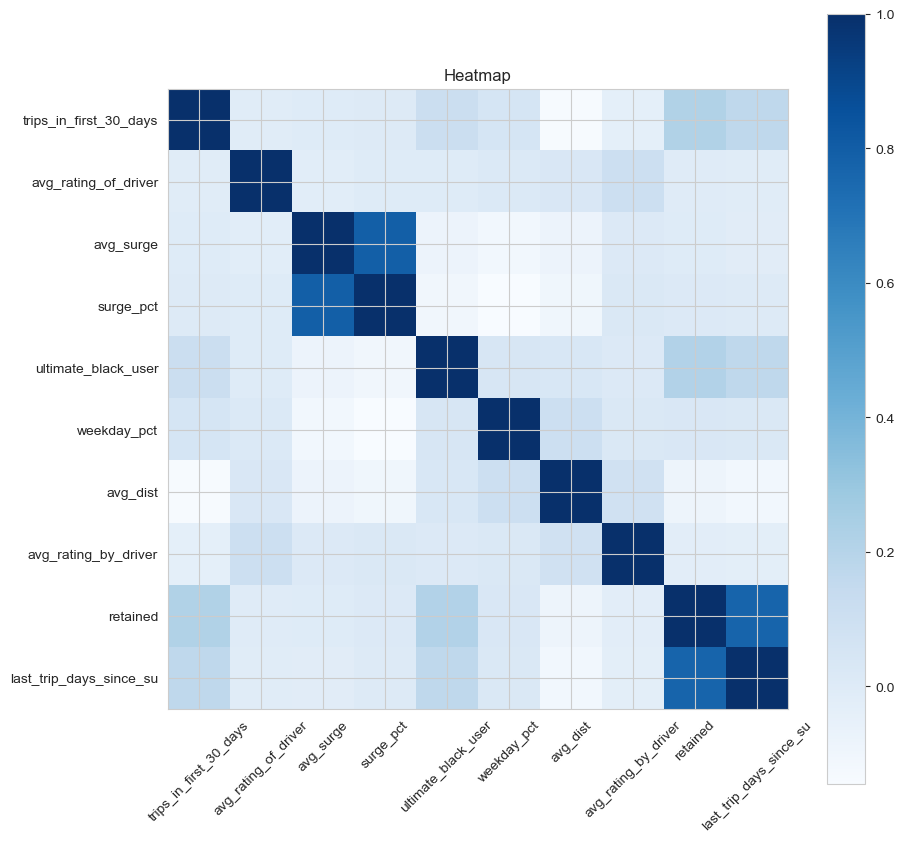

In [13]:
# Call the function with your desired x label font size
plot_heatmap(df, cmap='Blues', label_fontsize=10)  # Adjust the fontsize as needed

#### XGBoost Feature Importance

Feeding this data to XGBoost or any tree model does not look any better than the correlation matrix.
xgboost's XGBRegressor() also picks out the <font color=orange>last_trip_days_since_su</font> as the highest correlation

The rest of the features get scores in the 25% range.  While they may correlate better than some other features, I don't believe they are predictive:
- It also picks out the iphone and android phone types, but they both get the same score, so this is not reasonable to assume that phone type is any kind of differentiator
- Two cities: kings landing, and astapor get higher scores  

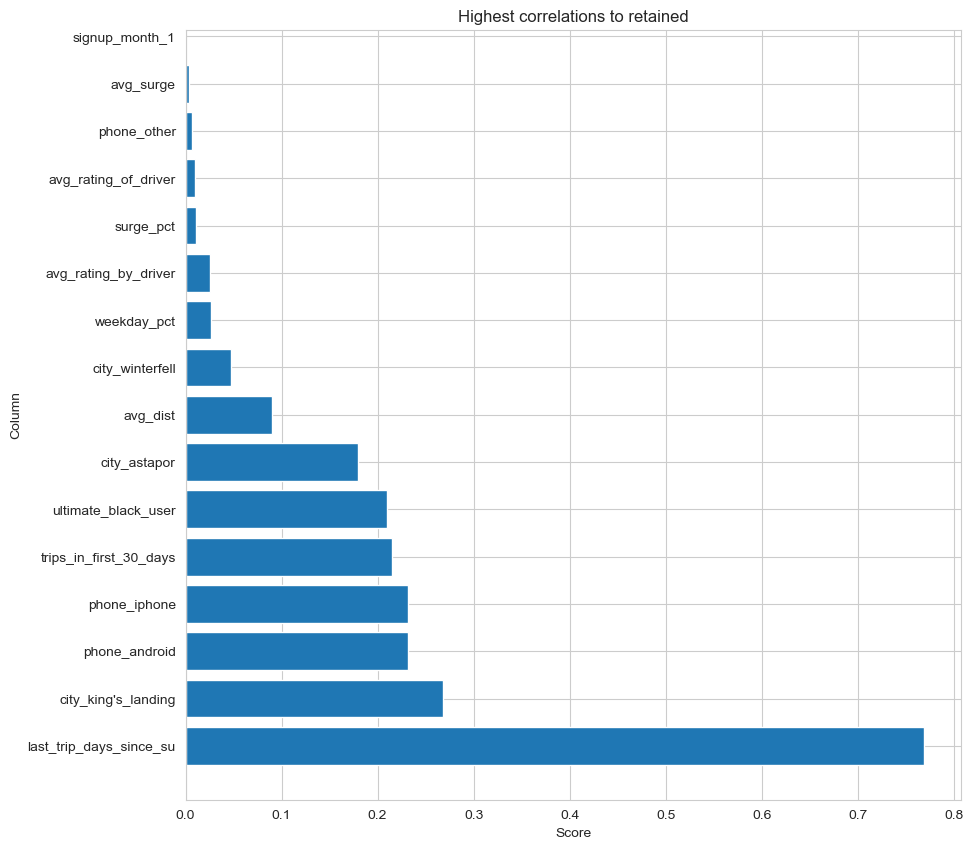

In [14]:
top_correlations, set_correlations = correlate_to_target(df_encoded, 'retained', 30)
plot_correlations(top_correlations['corr'], top_correlations['y'], 'Highest correlations to retained')


#### XGBoost Feature Importance

Feeding this data to XGBoost or any tree model does not look any better than the correlation matrix.
xgboost's XGBRegressor() also picks out the <font color=orange>last_trip_days_since_su</font> as the highest correlation

The rest of the features get scores in the 25% range.  While they may correlate better than some other features, I don't believe they are predictive:
- It also picks out the iphone and android phone types, but they both get the same score, so this is not reasonable to assume that phone type is any kind of differentiator
- Two cities: kings landing, and astapor get higher scores , but they are too low to be predictors (IMO)

In [15]:
y = df_encoded[['retained']]
X = df_encoded.loc[:, df_encoded.columns != 'retained']

In [16]:

top_features, set_features = calc_feature_importance(X, y, top_n=30)


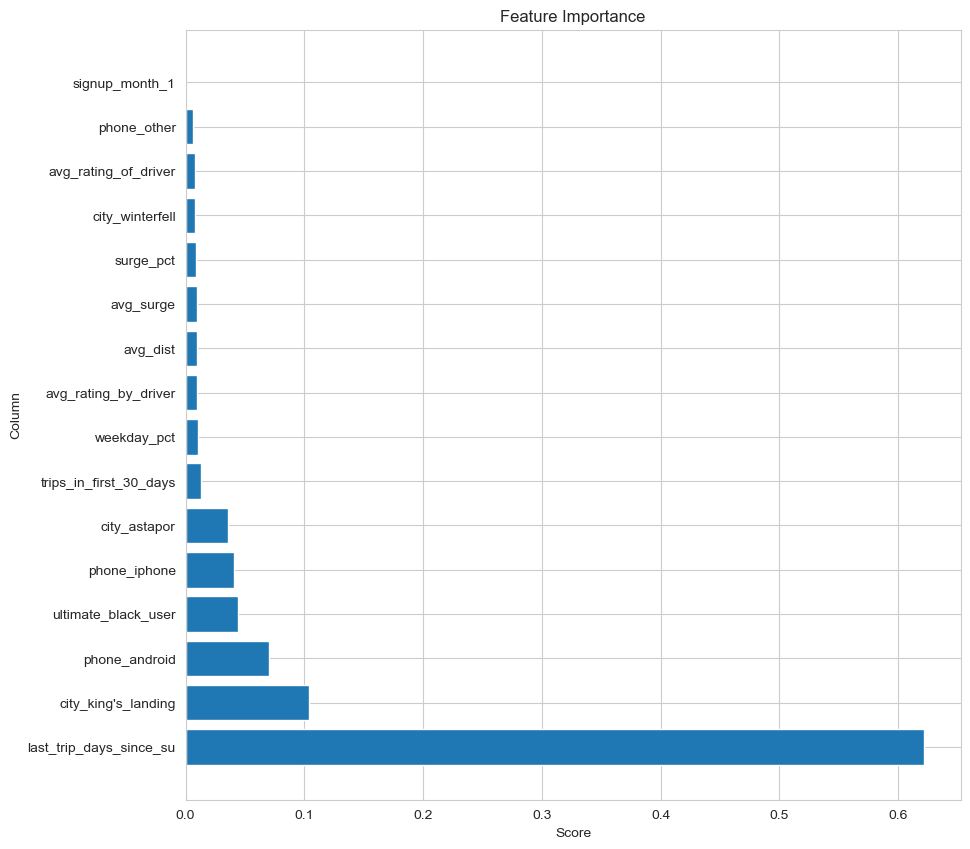

In [17]:
plot_correlations(
    top_features['corr'],
    top_features['y'], "Feature Importance")

#### XGBoost Feature without 'custom' features
I added the <font color=orange>last_trip_days_since_su</font>, and based on that I would say that length of membership could be more important than any of the given features...maybe...

But let's remove the <font color=orange>last_trip_days_since_su</font> feature and see where we stand.


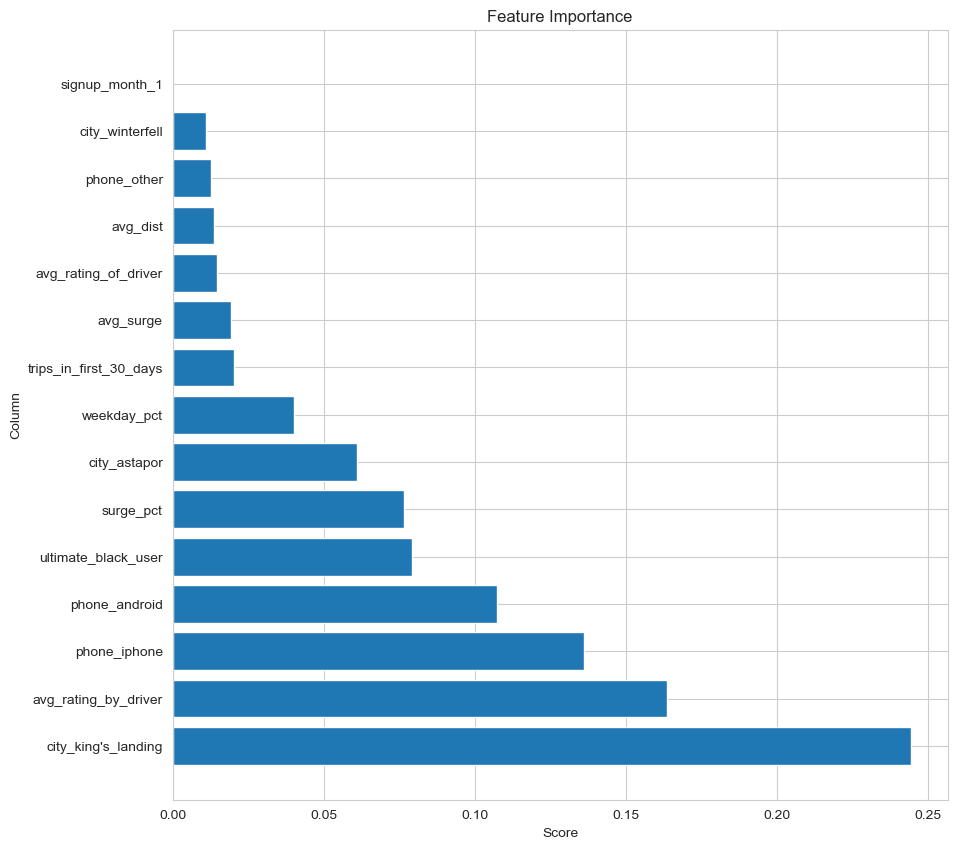

In [18]:
OriginalX = X.drop(columns=['last_trip_days_since_su'])
top_features, set_features = calc_feature_importance(OriginalX, y, top_n=30)
plot_correlations(
    top_features['corr'],
    top_features['y'], "Feature Importance")


<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Save and Retreat</h3>
</div>


With this combination, the city of kings landing and the average rating by driver look better. but I'm skeptical that they have any predictive power.
We certainly can't say definitively either way though, so we can save the X and y datasets and see how they predict in an ML model


In [19]:
import os

if not os.path.exists("./data"):
    os.makedirs("./data")

X.to_parquet("data/ultimate_features.parquet", engine='fastparquet', compression='snappy')
y.to_parquet("data/ultimate_target.parquet", engine='fastparquet', compression='snappy')